<a href="https://colab.research.google.com/github/andrija-sretovic/Deaths-in-US-analysis/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [9]:
print(df_hh_income.isna().sum())
print(df_pct_poverty.isna().sum())
print(df_pct_completed_hs.isna().sum())
print(df_share_race_city.isna().sum())
print(df_fatalities.isna().sum())

Geographic Area     0
City                0
Median Income      51
dtype: int64
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [12]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [13]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [31]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate, errors='coerce')

In [41]:
poverty_by_state = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': pd.Series.mean}).sort_values('poverty_rate').reset_index()

poverty_by_state.head()

,Geographic Area,poverty_rate
0,NJ,8.19
1,CT,9.14
2,MA,9.59
3,WY,9.89
4,MD,10.31


In [50]:

poverty_pct_bar = px.bar(poverty_by_state,
                         x='poverty_rate',
                         y='Geographic Area',
                         color='poverty_rate',
                         orientation='h',
                         title='Average Poverty Rate per State',
                         height=800
                         )
poverty_pct_bar.update_layout(xaxis_title='Poverty Percentage', yaxis_title='State', yaxis=dict(tickmode='array', tickvals=list(poverty_by_state['Geographic Area'])))

poverty_pct_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [46]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs, errors='coerce')

hs_graduatin_per_state = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': pd.Series.mean}).sort_values('percent_completed_hs', ascending=False).reset_index()

print(hs_graduatin_per_state.head())
print(hs_graduatin_per_state.tail())

  Geographic Area  percent_completed_hs
0              MA                 92.40
1              WY                 92.10
2              HI                 91.67
3              UT                 91.62
4              CT                 91.59
   Geographic Area  percent_completed_hs
46              AR                 79.95
47              LA                 79.29
48              GA                 79.01
49              MS                 78.47
50              TX                 75.69


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [47]:
merge_hh_pov = hs_graduatin_per_state.merge(poverty_by_state, on='Geographic Area')
merge_hh_pov.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,MA,92.40,9.59
1,WY,92.10,9.89
2,HI,91.67,13.40
3,UT,91.62,11.98
4,CT,91.59,9.14


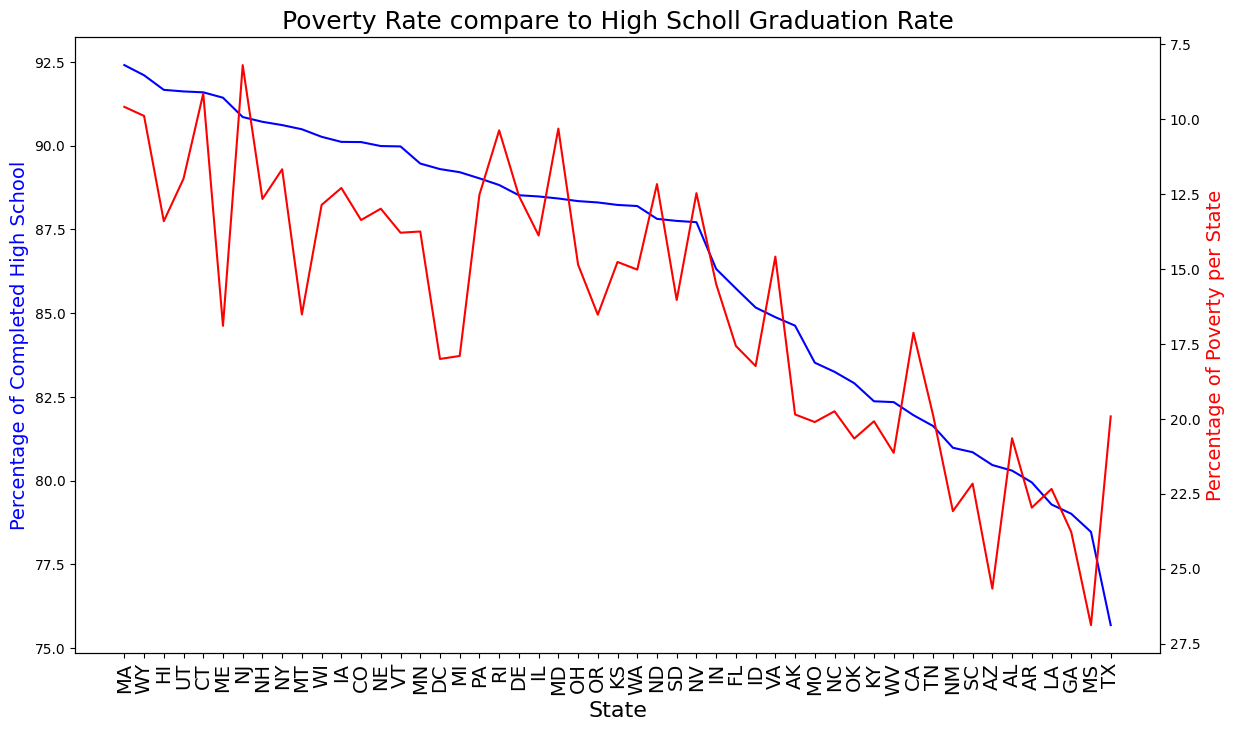

In [52]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Poverty Rate compare to High Scholl Graduation Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=90)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel('State', fontsize=16)
ax1.set_ylabel('Percentage of Completed High School', fontsize=14, color='blue')
ax2.set_ylabel('Percentage of Poverty per State', fontsize=14, color='red')
ax2.invert_yaxis()
ax1.plot(merge_hh_pov['Geographic Area'], merge_hh_pov.percent_completed_hs, color='blue')
ax2.plot(merge_hh_pov['Geographic Area'], merge_hh_pov.poverty_rate, color='red')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

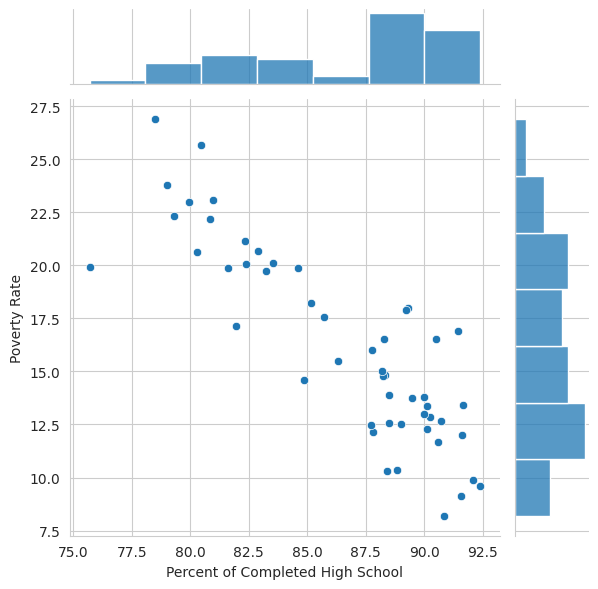

In [56]:
with sns.axes_style('whitegrid'):
  plot = sns.jointplot(merge_hh_pov,
                       x='percent_completed_hs',
                       y='poverty_rate'
                       )
  plot.set_axis_labels('Percent of Completed High School',
                       'Poverty Rate')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

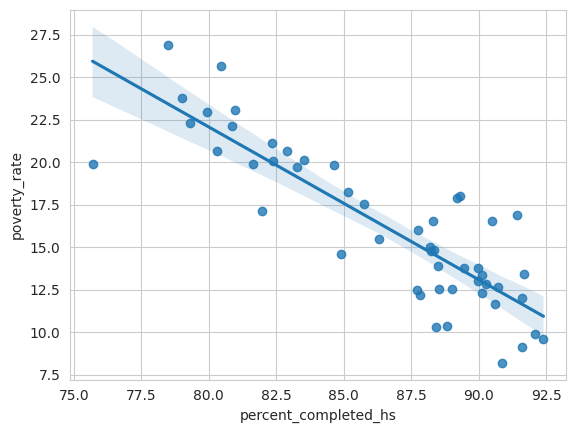

In [61]:
with sns.axes_style('whitegrid'):
  plot = sns.regplot(merge_hh_pov,
                     x='percent_completed_hs',
                     y='poverty_rate'
                     )

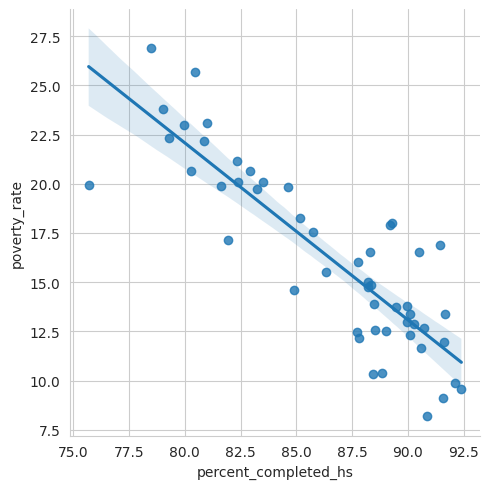

In [152]:
with sns.axes_style('whitegrid'):
  plot = sns.lmplot(merge_hh_pov,
                     x='percent_completed_hs',
                     y='poverty_rate'
                     )

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [80]:
df_share_race_city[['share_white',	'share_black',	'share_native_american',	'share_asian',	'share_hispanic']] = df_share_race_city[['share_white',	'share_black',	'share_native_american',	'share_asian',	'share_hispanic']].apply(pd.to_numeric, errors='coerce')

race_per_state = df_share_race_city.groupby('Geographic area').mean().reset_index()

race_per_state.head()

<ipython-input-80-77b4bb8d337b>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [93]:

fig = px.bar(race_per_state,
             x='Geographic area',
             y=['share_white',	'share_black',	'share_native_american',	'share_asian',	'share_hispanic'],
             title='Share of Victims per Race per State'
             )
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Number of Victims'
)
fig.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [86]:
killed_by_race = df_fatalities.race.value_counts()
killed_by_race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [89]:
pie = px.pie(names=killed_by_race.index,
             values=killed_by_race.values,
             title='Race of people killed'
             )

pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [94]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [96]:
victim_gender = df_fatalities.gender.value_counts()

victim_gender

M    2428
F     107
Name: gender, dtype: int64

In [97]:
pie = px.pie(names=victim_gender.index,
             values=victim_gender.values,
             title='Gender of victims'
             )

pie.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [107]:
by_gender = df_fatalities.groupby(['gender', 'manner_of_death']).size().reset_index(name='count')

by_gender

,gender,manner_of_death,count
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


In [108]:
by_gender_age = df_fatalities.groupby(['gender', 'age']).size().reset_index(name='count')

by_gender_age

,gender,age,count
0,F,12.00,1
1,F,16.00,1
2,F,17.00,4
3,F,18.00,1
4,F,20.00,1
...,...,...,...
112,M,80.00,1
113,M,82.00,2
114,M,83.00,2
115,M,86.00,2


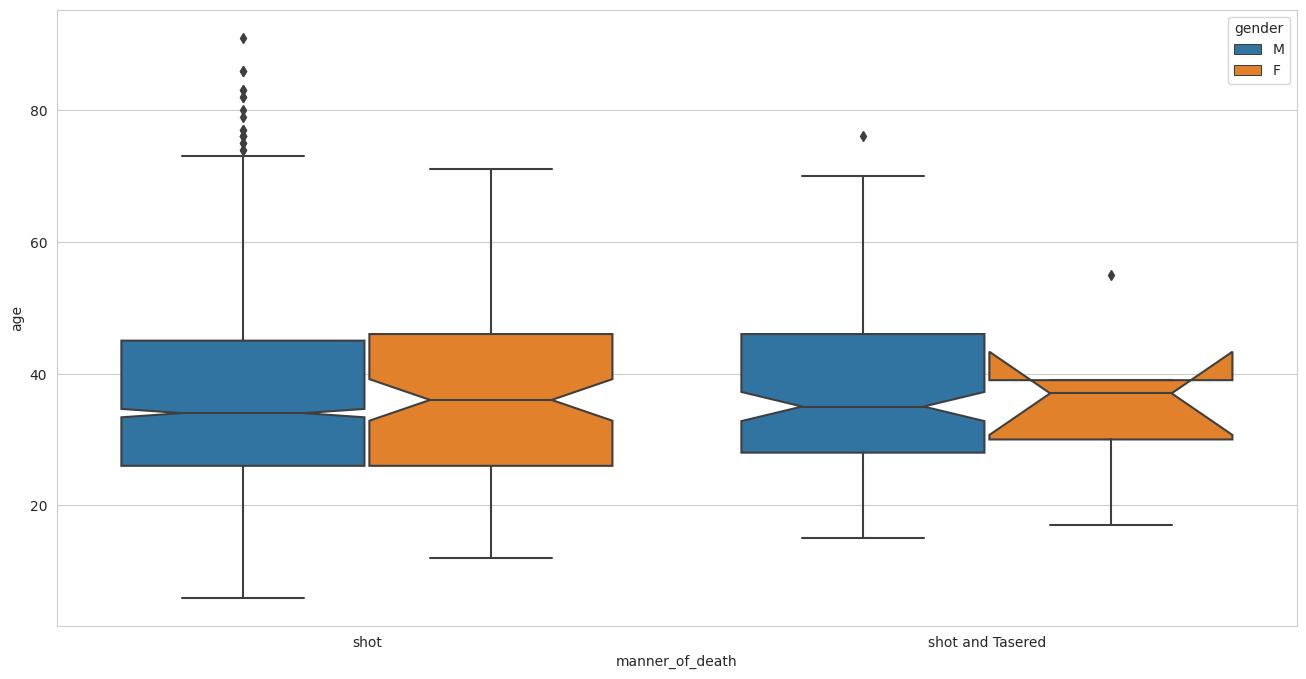

In [182]:
plt.figure(figsize=(16, 8))

with sns.axes_style('whitegrid'):
  plot = sns.boxplot(df_fatalities,
                     x='manner_of_death',
                     y='age',
                     hue='gender',
                     notch=True
                     )

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [110]:
armed = df_fatalities.armed.value_counts().sort_values(ascending=True)

armed

pen                           1
metal rake                    1
motorcycle                    1
glass shard                   1
baseball bat and bottle       1
                           ... 
undetermined                117
unarmed                     171
vehicle                     177
knife                       373
gun                        1398
Name: armed, Length: 68, dtype: int64

In [113]:
bar = px.bar(x=armed.values,
             y=armed.index,
             color=armed.values,
             orientation='h',
             title='Weapons held by Victims',
             height=1000
             )

bar.update_layout(xaxis_title='Numebr of Victims', yaxis_title='Weapon', yaxis=dict(tickmode='array', tickvals=list(armed.index)))

bar.show()

In [117]:
armed_unarmed = df_fatalities[df_fatalities['armed'].isin(['gun', 'unarmed'])].armed.value_counts()

pie = px.pie(names=armed_unarmed.index,
             values=armed_unarmed.values,
             title='Unarmed Victims vs Victims with Guns'
             )

pie.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [135]:
by_ages = df_fatalities.age.value_counts().sort_index()

by_age = pd.DataFrame(by_ages).reset_index()
by_age.columns = ['age', 'count']
by_age

,age,count
0,6.00,1
1,12.00,1
2,13.00,1
3,14.00,1
4,15.00,8
...,...,...
68,80.00,1
69,82.00,2
70,83.00,2
71,86.00,2


In [146]:
print(f"Percentage of people killed under the age of 25 is {round(by_age[by_age.age < 25]['count'].sum() / by_age['count'].sum() * 100)}%")

Percentage of people killed under the age of 25 is 18%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

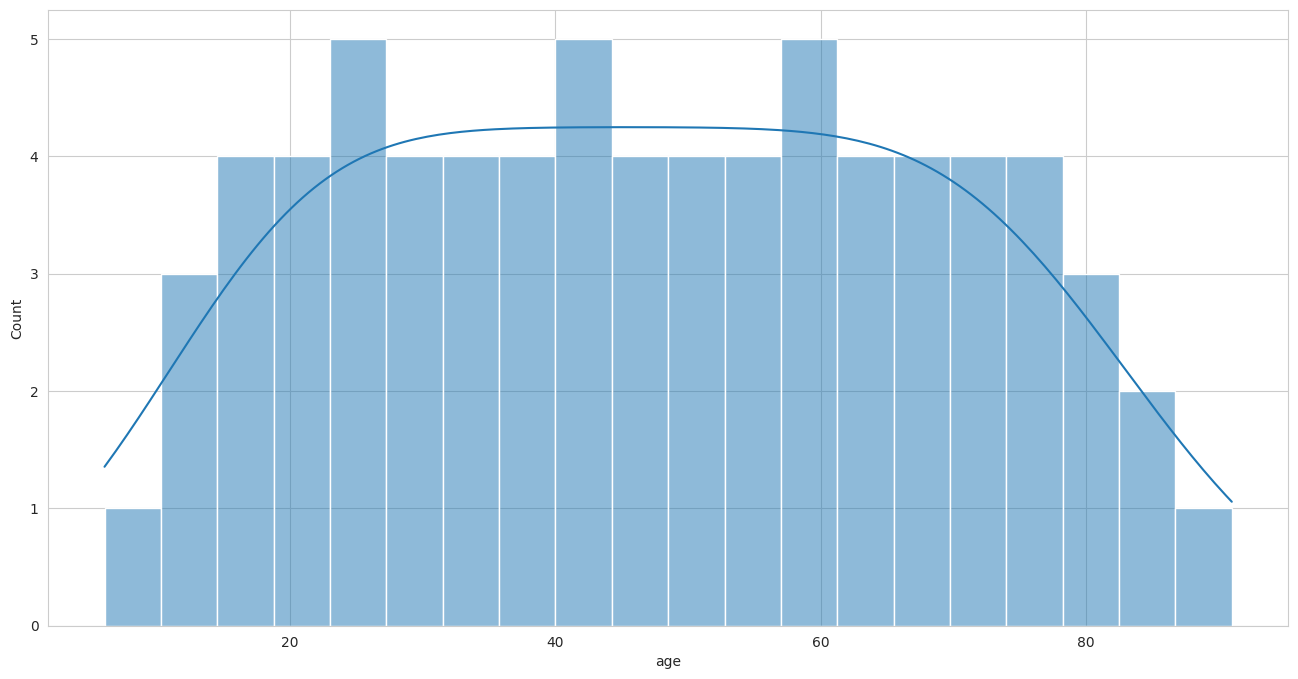

In [150]:
plt.figure(figsize=(16, 8))

with sns.axes_style('whitegrid'):
  plot = sns.histplot(by_age,
                      x='age',
                      kde=True,
                      bins=20
                      )

Create a seperate KDE plot for each race. Is there a difference between the distributions?

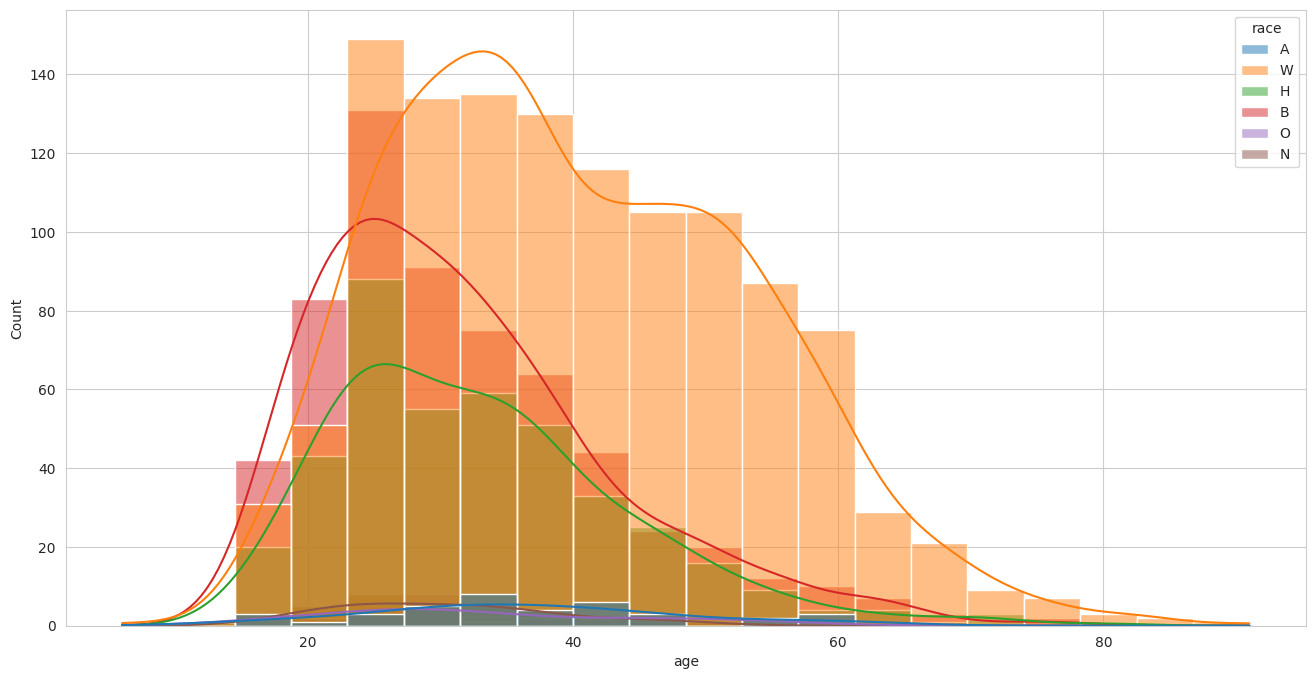

In [149]:
plt.figure(figsize=(16, 8))

with sns.axes_style('whitegrid'):
  plot = sns.histplot(df_fatalities,
                      x='age',
                      hue='race',
                      kde=True,
                      bins=20
                      )

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [154]:
by_race = df_fatalities.race.value_counts().sort_values()

by_race

O      28
N      31
A      39
H     423
B     618
W    1201
Name: race, dtype: int64

In [156]:
bar = px.bar(x=by_race.values,
             y=by_race.index,
             color=by_race.values,
             orientation='h',
             title='Victims sorted by their Race'
             )

bar.update_layout(xaxis_title='Numebr of Victims', yaxis_title='Race')

bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [157]:
mental = df_fatalities.signs_of_mental_illness.value_counts()

mental

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [158]:
pie = px.pie(names=mental.index,
             values=mental.values,
             title='Victims with Signs of Mental Illness vs Without Signs of Menatl Illnes'
             )

pie.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [159]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [163]:
dangerous_cities = df_fatalities.city.value_counts().head(10)

dangerous_cities.sort_values(inplace=True)

In [165]:
bar = px.bar(x=dangerous_cities.values,
             y=dangerous_cities.index,
             color=dangerous_cities.values,
             orientation='h',
             title='Citis with Most Killing by Cops'
             )

bar.update_layout(xaxis_title='Number of Victims', yaxis_title='City')

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [175]:
dangerous = df_fatalities[df_fatalities.city.isin(dangerous_cities.index)]
dangerous_by_race = dangerous.groupby(['city', 'race']).size().reset_index(name='count')

dangerous_by_race

,city,race,count
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,B,21
4,Chicago,H,1
5,Chicago,W,2
6,Columbus,B,11
7,Columbus,O,1
8,Columbus,W,6
9,Houston,A,1


In [177]:
fig = px.bar(dangerous_by_race,
             x='city',
             y='count',
             color='race',
             title='Top 10 Cities with the most Victims and their races'
             )
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Number of Victims'
)
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [196]:
by_state = df_fatalities.state.value_counts()

by_state.head()

CA    424
TX    225
FL    154
AZ    118
OH     79
Name: state, dtype: int64

In [195]:
choro = px.choropleth(locations=by_state.index,
                      color=by_state.values,
                      hover_name=by_state.index,
                      color_continuous_scale='matter',
                      locationmode='USA-states',
                      scope='usa'
                    )

choro.update_geos(fitbounds="locations", visible=False)

choro.show()

In [210]:
choro2 = px.choropleth(poverty_by_state,
                       locations='Geographic Area',
                       color='poverty_rate',
                       hover_name='Geographic Area',
                       color_continuous_scale='matter',
                       locationmode='USA-states',
                       scope='usa'
                       )

choro2.update_geos(fitbounds="locations", visible=False)

choro2.show()

In [211]:
print("Comparing states with high number of victims with states with high poverty rate, we can see a very vague correlation.\nI guess that slightly poorer states seem to have a slightly higher number of victims.\nBut this is far from concrete.\nClosenes to the border with Mexico is far more important I believe as is the amount of big cities located in each state.")

Comparing states with high number of victims with states with high poverty rate, we can see a very vague correlation.
I guess that slightly poorer states seem to have a slightly higher number of victims.
But this is far from concrete.
Closenes to the border with Mexico is far more important I believe as is the amount of big cities located in each state.


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [189]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

type(df_fatalities.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [206]:
by_date = df_fatalities.date.value_counts().sort_index().rolling(window=30).mean()

by_date

2015-01-03    NaN
2015-01-04    NaN
2015-01-06    NaN
2015-01-07    NaN
2015-01-08    NaN
             ... 
2017-12-03   2.87
2017-12-04   2.87
2017-12-05   2.90
2017-12-06   2.93
2017-12-07   3.00
Name: date, Length: 879, dtype: float64

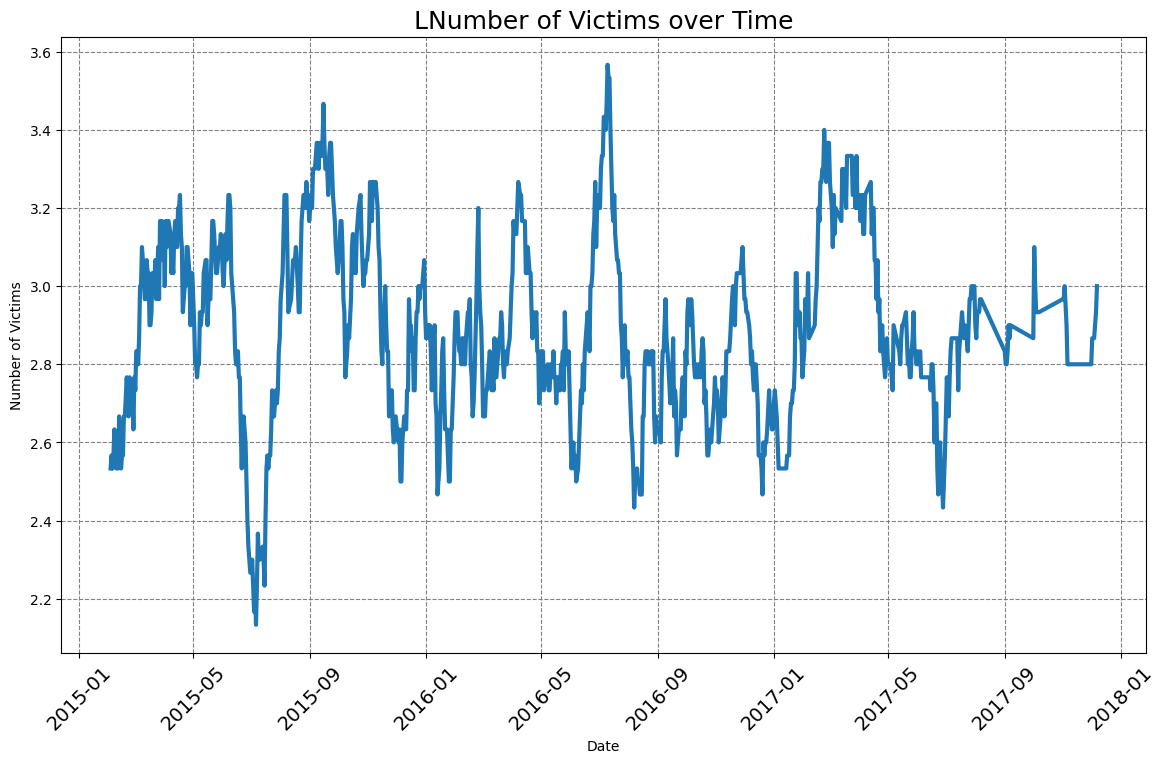

In [207]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('LNumber of Victims over Time', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()

ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Number of Victims')
ax.set_xlabel('Date')

ax.plot(by_date.index, by_date.values, lw=3)

plt.show()

In [213]:
print("Sadly we can see that in genreal not much has been done to decrease the number of deaths by cops.\nThe average number of victims across the country is pretty steady between 2 and 3.5.")

Sadly we can see that in genreal not much has been done to decrease the number of deaths by cops.
The average number of victims across the country is pretty steady between 2 and 3.5.


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [215]:
print("As mentioned above not much succes has been made to decrease the number of victims in the few years of data we have been provided.\nWe can see that racialy white people are killed by far the most even though various media seem to paint a different picture.\nMy view on this is that black and hispanic people are killed in bigger groupings.\nWe saw in the top 10 cities that only three of them have the most victims that are white.\nAnother factor which I think is that black victims are much younger overall as data has shown us.")

As mentioned above not much succes has been made to decrease the number of victims in the few years of data we have been provided.
We can see that racialy white people are killed by far the most even though various media seem to paint a different picture.
My view on this is that black and hispanic people are killed in bigger groupings.
We saw in the top 10 cities that only three of them have the most victims that are white.
Another factor which I think is that black victims are much younger overall as data has shown us.
